# Метод k-средних (K-Means clustering)

---

**Источники:**

[Метод k-средних](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85)

[k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

[]()

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install -c conda-forge umap-learn -y

In [4]:
import numpy as np

np.__version__

'1.20.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.4'

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import umap
from umap import UMAP

umap.__version__

'0.5.1'

In [9]:
import sklearn

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OrdinalEncoder

sklearn.__version__

'0.24.2'

## Описание

TODO

## Загрузка данных

[Источник (custDatasets)](https://www.kaggle.com/gangliu/custdatasets).

In [10]:
df = pd.read_csv('./../../data/Cust_Segmentation.csv', index_col=0)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4


## Анализ данных

См. лекцию [02_pca](../../08_modeling_ml_demensionality_reduction/lectures/02_pca.ipynb)

## Подготовка данных

In [11]:
df['Defaulted'].fillna(0, inplace=True)
df['Defaulted'] = df['Defaulted'].astype(int)
df['Defaulted'].isna().sum()

0

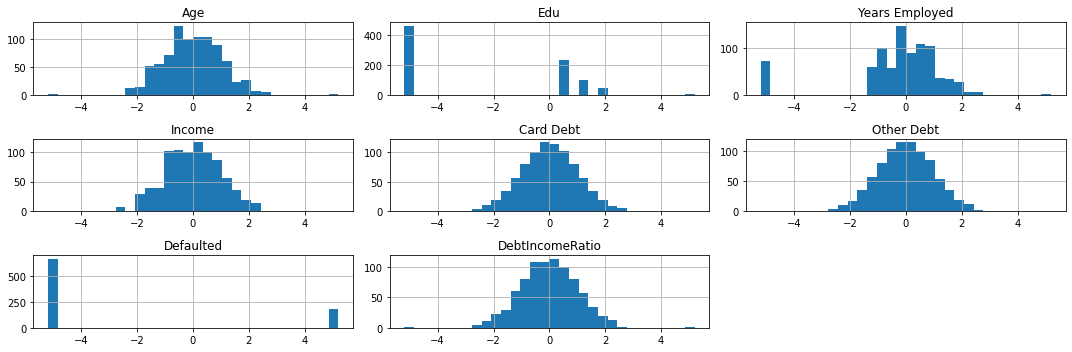

In [12]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
norm_trans = QuantileTransformer(output_distribution='normal', n_quantiles=100)
df_norm = pd.DataFrame(norm_trans.fit_transform(df[num_cols]), columns=num_cols)
df_norm.hist(bins=30, figsize=(15, 5))
plt.tight_layout()

## 3-D PCA

In [13]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [41]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-155, elev=45)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
%matplotlib inline

## 3-D UMAP

In [16]:
umap_3 = UMAP(n_components=3)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

In [42]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=25, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
%matplotlib inline

## Построение модели (4 кластера)

In [19]:
from sklearn.cluster import KMeans

k_means_4 = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means_4.fit(df_norm)

n_clusters_4 = k_means_4.n_clusters

labels_4 = k_means_4.labels_
labels_4

array([1, 2, 3, 1, 2, 2, 1, 1, 2, 1, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2, 1, 1,
       3, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 3, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1,
       3, 3, 1, 1, 0, 0, 1, 1, 2, 2, 3, 1, 0, 1, 2, 0, 3, 2, 2, 2, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 1, 1, 2, 2, 3, 2,
       1, 2, 2, 2, 3, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 2, 0,
       2, 2, 3, 2, 3, 1, 2, 0, 3, 1, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 2,
       3, 1, 2, 1, 3, 2, 2, 0, 1, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 1, 2, 2,
       3, 1, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, 2, 0, 2, 2, 2, 1, 1, 3,
       2, 0, 2, 1, 2, 2, 3, 2, 2, 1, 1, 0, 3, 3, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 3, 2, 3, 2, 1,

## Анализ результатов (4 кластера)

### 3-D PCA

In [43]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-155, elev=45)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels_4, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
%matplotlib inline

### 3-D UMAP

In [44]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=142, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels_4, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
%matplotlib inline

### Анализ "представителей" кластеров

In [24]:
df["Cluster_4"] = labels_4
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,1
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,3
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,1
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2
...,...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,2
847,28,2,7,34,0.359,2.021,0,NBA002,7.0,1
848,25,4,0,18,2.802,3.210,1,NBA001,33.4,3


In [25]:
df.groupby('Cluster_4').mean().round(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster_4,,,,,,,,
0,33.47,1.00,6.03,32.72,2.43,3.30,1.0,15.57
1,35.62,2.53,8.54,55.71,1.47,3.17,0.0,8.69
2,35.55,1.00,10.19,42.52,1.25,2.64,0.0,9.10
3,32.66,2.59,4.62,47.66,2.42,4.29,1.0,14.09


In [26]:
clusters = {}

for c in range(n_clusters_4):
    clusters[c] = df[df.Cluster_4 == c]
    display(clusters[c])
    display(clusters[c].describe())
    print('\n', '=' * 100, '\n')

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
38,37,1,0,18,1.584,0.738,1,NBA018,12.9,0
41,20,1,4,14,0.201,1.157,1,NBA000,9.7,0
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,0
56,34,1,2,25,0.573,2.577,1,NBA011,12.6,0
57,32,1,1,20,0.315,0.645,1,NBA000,4.8,0
...,...,...,...,...,...,...,...,...,...,...
803,26,1,0,14,0.302,0.748,1,NBA000,7.5,0
810,22,1,4,19,1.887,2.502,1,NBA003,23.1,0
814,31,1,10,49,3.237,1.565,1,NBA012,9.8,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.0
mean,33.468354,1.0,6.025316,32.721519,2.425937,3.304101,1.0,15.569620,0.0
std,9.371035,0.0,6.476733,23.753508,3.634974,3.581543,0.0,8.485392,0.0
min,20.000000,1.0,0.000000,14.000000,0.073000,0.182000,1.0,2.100000,0.0
25%,26.000000,1.0,1.000000,19.000000,0.569000,1.000000,1.0,9.300000,0.0
50%,31.000000,1.0,4.000000,24.000000,1.370000,2.350000,1.0,14.800000,0.0
75%,38.500000,1.0,9.000000,39.500000,2.514500,3.661500,1.0,22.200000,0.0
max,55.000000,1.0,31.000000,136.000000,20.561000,17.204000,1.0,41.300000,0.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,1
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,1
7,38,2,4,56,0.442,0.454,0,NBA013,1.6,1
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,1
10,47,3,23,115,0.653,3.947,0,NBA011,4.0,1
...,...,...,...,...,...,...,...,...,...,...
837,23,2,3,24,0.552,0.960,0,NBA004,6.3,1
841,38,3,13,25,0.343,1.082,0,NBA018,5.7,1
842,29,3,7,63,0.572,2.893,0,NBA001,5.5,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000,286.0
mean,35.622378,2.534965,8.541958,55.706294,1.472444,3.165122,0.0,8.685315,1.0
std,8.071004,0.761232,6.441368,40.263576,1.704603,3.176850,0.0,5.656841,0.0
min,20.000000,2.000000,0.000000,14.000000,0.015000,0.053000,0.0,0.100000,1.0
25%,29.000000,2.000000,3.000000,28.000000,0.403500,1.021000,0.0,4.400000,1.0
50%,35.000000,2.000000,8.000000,43.000000,0.891500,2.067000,0.0,7.550000,1.0
75%,41.000000,3.000000,12.000000,68.750000,1.839750,4.272250,0.0,12.175000,1.0
max,54.000000,5.000000,31.000000,266.000000,9.877000,18.269000,0.0,32.400000,1.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2
6,40,1,23,81,0.998,7.831,0,NBA016,10.9,2
9,26,1,5,18,0.575,2.215,0,NBA006,15.5,2
13,24,1,7,18,0.526,0.643,0,NBA000,6.5,2
...,...,...,...,...,...,...,...,...,...,...
843,32,1,14,36,0.273,0.591,0,NBA000,2.4,2
845,41,1,7,43,0.694,1.198,0,NBA011,4.4,2
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,381.000000,381.0,381.000000,381.000000,381.000000,381.000000,381.0,381.000000,381.0
mean,35.553806,1.0,10.188976,42.519685,1.248325,2.637367,0.0,9.098950,2.0
std,7.639948,0.0,6.984644,33.463378,1.565625,3.006015,0.0,5.843872,0.0
min,21.000000,1.0,0.000000,13.000000,0.012000,0.046000,0.0,0.400000,2.0
25%,30.000000,1.0,4.000000,23.000000,0.304000,0.993000,0.0,4.900000,2.0
50%,35.000000,1.0,9.000000,33.000000,0.764000,1.778000,0.0,7.900000,2.0
75%,41.000000,1.0,15.000000,50.000000,1.474000,3.021000,0.0,12.000000,2.0
max,56.000000,1.0,33.000000,324.000000,13.553000,35.197000,0.0,32.500000,2.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4
Customer Id,,,,,,,,,,
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,3
11,44,3,8,88,0.285,5.083,1,NBA010,6.1,3
15,28,3,2,20,0.233,1.647,1,NBA000,9.4,3
23,28,3,6,47,5.574,3.732,1,NBA008,19.8,3
33,23,2,0,42,1.019,0.619,1,NBA001,3.9,3
...,...,...,...,...,...,...,...,...,...,...
797,25,4,0,24,1.597,1.307,1,NBA006,12.1,3
817,36,2,6,27,0.262,0.980,1,NBA015,4.6,3
824,27,4,0,25,1.419,1.756,1,NBA000,12.7,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.0
mean,32.663462,2.586538,4.615385,47.663462,2.422279,4.287221,1.0,14.088462,3.0
std,7.836448,0.758263,4.653650,52.537109,2.908140,4.689026,0.0,7.407701,0.0
min,21.000000,2.000000,0.000000,15.000000,0.118000,0.161000,1.0,0.900000,3.0
25%,27.000000,2.000000,1.000000,24.000000,0.480750,1.459000,1.0,8.475000,3.0
50%,31.000000,2.000000,3.000000,33.000000,1.446000,2.711000,1.0,13.450000,3.0
75%,39.000000,3.000000,6.250000,52.750000,3.059000,5.071750,1.0,18.475000,3.0
max,53.000000,5.000000,18.000000,446.000000,16.031000,27.034000,1.0,36.600000,3.0


#### 2-D

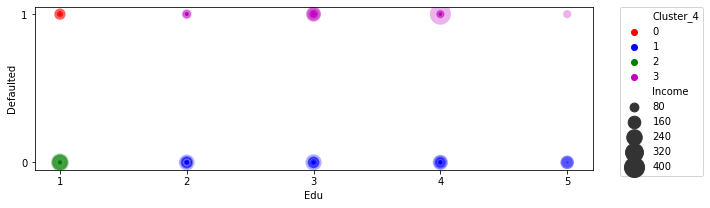

In [27]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.scatterplot(x=df.Edu, 
                y=df.Defaulted, 
                size=df.Income, 
                sizes=(10, 450), 
                hue=df.Cluster_4, 
                palette=['r', 'b', 'g', 'm'], 
                alpha=0.3,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 3-D

In [46]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-45, elev=25)


ax.scatter(df.Edu, df.Defaulted, df.Income, 
           c=df.Cluster_4,
           alpha=0.5, 
           s=50)

ax.set_xlabel('Education')
ax.set_ylabel('Defaulted')
ax.set_zlabel('Income')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Income')

In [29]:
%matplotlib inline

## Построение модели (5 кластеров)

In [30]:
from sklearn.cluster import KMeans

k_means_5 = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means_5.fit(df_norm)

n_clusters_5 = k_means_5.n_clusters

labels_5 = k_means_5.labels_

## Анализ результатов (7 кластеров)

### 3-D PCA

In [47]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-110, elev=20)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels_5, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
%matplotlib inline

### 3-D UMAP

In [48]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=130, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels_5, 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
%matplotlib inline

### Анализ "представителей" кластеров

In [35]:
df["Cluster_5"] = labels_5
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,1,4
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2,1
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,3,0
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,1,4
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,2,1
847,28,2,7,34,0.359,2.021,0,NBA002,7.0,1,4
848,25,4,0,18,2.802,3.210,1,NBA001,33.4,3,0


In [36]:
df.groupby('Cluster_5').mean().round(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4
Cluster_5,,,,,,,,,
0,32.66,2.59,4.62,47.66,2.42,4.29,1.0,14.09,3.00
1,35.70,1.00,10.58,43.35,1.26,2.69,0.0,9.09,2.00
2,29.38,2.17,0.00,24.72,0.81,1.69,0.0,9.43,1.35
3,33.47,1.00,6.03,32.72,2.43,3.30,1.0,15.57,0.00
4,36.37,2.51,9.40,58.59,1.54,3.29,0.0,8.60,1.00


In [37]:
clusters = {}

for c in range(n_clusters_5):
    clusters[c] = df[df.Cluster_5 == c]
    display(clusters[c])
    display(clusters[c].describe())
    print('\n', '=' * 100, '\n')

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,3,0
11,44,3,8,88,0.285,5.083,1,NBA010,6.1,3,0
15,28,3,2,20,0.233,1.647,1,NBA000,9.4,3,0
23,28,3,6,47,5.574,3.732,1,NBA008,19.8,3,0
33,23,2,0,42,1.019,0.619,1,NBA001,3.9,3,0
...,...,...,...,...,...,...,...,...,...,...,...
797,25,4,0,24,1.597,1.307,1,NBA006,12.1,3,0
817,36,2,6,27,0.262,0.980,1,NBA015,4.6,3,0
824,27,4,0,25,1.419,1.756,1,NBA000,12.7,3,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000,104.0,104.0
mean,32.663462,2.586538,4.615385,47.663462,2.422279,4.287221,1.0,14.088462,3.0,0.0
std,7.836448,0.758263,4.653650,52.537109,2.908140,4.689026,0.0,7.407701,0.0,0.0
min,21.000000,2.000000,0.000000,15.000000,0.118000,0.161000,1.0,0.900000,3.0,0.0
25%,27.000000,2.000000,1.000000,24.000000,0.480750,1.459000,1.0,8.475000,3.0,0.0
50%,31.000000,2.000000,3.000000,33.000000,1.446000,2.711000,1.0,13.450000,3.0,0.0
75%,39.000000,3.000000,6.250000,52.750000,3.059000,5.071750,1.0,18.475000,3.0,0.0
max,53.000000,5.000000,18.000000,446.000000,16.031000,27.034000,1.0,36.600000,3.0,0.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,2,1
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,2,1
6,40,1,23,81,0.998,7.831,0,NBA016,10.9,2,1
9,26,1,5,18,0.575,2.215,0,NBA006,15.5,2,1
13,24,1,7,18,0.526,0.643,0,NBA000,6.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
843,32,1,14,36,0.273,0.591,0,NBA000,2.4,2,1
845,41,1,7,43,0.694,1.198,0,NBA011,4.4,2,1
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,2,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,367.000000,367.0,367.000000,367.000000,367.000000,367.000000,367.0,367.00000,367.0,367.0
mean,35.702997,1.0,10.577657,43.348774,1.264812,2.690534,0.0,9.09455,2.0,1.0
std,7.653462,0.0,6.821201,33.796860,1.582668,3.043518,0.0,5.81298,0.0,0.0
min,21.000000,1.0,1.000000,13.000000,0.012000,0.101000,0.0,0.40000,2.0,1.0
25%,30.000000,1.0,5.000000,24.000000,0.320000,1.011000,0.0,4.90000,2.0,1.0
50%,35.000000,1.0,10.000000,33.000000,0.777000,1.820000,0.0,8.00000,2.0,1.0
75%,41.000000,1.0,15.000000,51.500000,1.487000,3.102500,0.0,12.00000,2.0,1.0
max,56.000000,1.0,33.000000,324.000000,13.553000,35.197000,0.0,32.50000,2.0,1.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,1,2
86,26,1,0,15,0.386,0.424,0,NBA002,5.4,2,2
87,22,4,0,25,1.491,1.559,0,NBA001,12.2,1,2
100,22,3,0,20,0.219,0.721,0,NBA002,4.7,1,2
112,25,4,0,32,2.140,3.492,0,NBA002,17.6,1,2
130,27,1,0,16,0.183,0.089,0,NBA001,1.7,2,2
142,23,2,0,21,0.455,1.372,0,NBA004,8.7,1,2
197,21,2,0,16,0.150,0.938,0,NBA001,6.8,1,2
200,41,3,0,26,0.099,0.343,0,NBA021,1.7,1,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,40.00000,40.000000,40.0,40.000000,40.000000,40.000000,40.0,40.00000,40.000000,40.0
mean,29.37500,2.175000,0.0,24.725000,0.806875,1.689150,0.0,9.43000,1.350000,2.0
std,7.87299,1.059451,0.0,10.317989,0.803384,1.562216,0.0,5.86048,0.483046,0.0
min,20.00000,1.000000,0.0,14.000000,0.025000,0.046000,0.0,0.90000,1.000000,2.0
25%,22.75000,1.000000,0.0,17.750000,0.202000,0.680500,0.0,5.40000,1.000000,2.0
50%,27.00000,2.000000,0.0,21.500000,0.473000,1.208000,0.0,7.80000,1.000000,2.0
75%,34.25000,3.000000,0.0,28.250000,1.249250,2.048000,0.0,12.25000,2.000000,2.0
max,48.00000,4.000000,0.0,64.000000,2.778000,6.306000,0.0,24.20000,2.000000,2.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
38,37,1,0,18,1.584,0.738,1,NBA018,12.9,0,3
41,20,1,4,14,0.201,1.157,1,NBA000,9.7,0,3
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,0,3
56,34,1,2,25,0.573,2.577,1,NBA011,12.6,0,3
57,32,1,1,20,0.315,0.645,1,NBA000,4.8,0,3
...,...,...,...,...,...,...,...,...,...,...,...
803,26,1,0,14,0.302,0.748,1,NBA000,7.5,0,3
810,22,1,4,19,1.887,2.502,1,NBA003,23.1,0,3
814,31,1,10,49,3.237,1.565,1,NBA012,9.8,0,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.0,79.000000,79.0,79.0
mean,33.468354,1.0,6.025316,32.721519,2.425937,3.304101,1.0,15.569620,0.0,3.0
std,9.371035,0.0,6.476733,23.753508,3.634974,3.581543,0.0,8.485392,0.0,0.0
min,20.000000,1.0,0.000000,14.000000,0.073000,0.182000,1.0,2.100000,0.0,3.0
25%,26.000000,1.0,1.000000,19.000000,0.569000,1.000000,1.0,9.300000,0.0,3.0
50%,31.000000,1.0,4.000000,24.000000,1.370000,2.350000,1.0,14.800000,0.0,3.0
75%,38.500000,1.0,9.000000,39.500000,2.514500,3.661500,1.0,22.200000,0.0,3.0
max,55.000000,1.0,31.000000,136.000000,20.561000,17.204000,1.0,41.300000,0.0,3.0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster_4,Cluster_5
Customer Id,,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,1,4
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,1,4
7,38,2,4,56,0.442,0.454,0,NBA013,1.6,1,4
10,47,3,23,115,0.653,3.947,0,NBA011,4.0,1,4
12,34,2,9,40,0.374,0.266,0,NBA003,1.6,1,4
...,...,...,...,...,...,...,...,...,...,...,...
837,23,2,3,24,0.552,0.960,0,NBA004,6.3,1,4
841,38,3,13,25,0.343,1.082,0,NBA018,5.7,1,4
842,29,3,7,63,0.572,2.893,0,NBA001,5.5,1,4


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_4,Cluster_5
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.0,260.000000,260.0,260.0
mean,36.369231,2.507692,9.396154,58.592308,1.539500,3.288731,0.0,8.599231,1.0,4.0
std,7.656363,0.758439,6.131820,40.981811,1.759749,3.262611,0.0,5.684776,0.0,0.0
min,21.000000,2.000000,1.000000,14.000000,0.015000,0.053000,0.0,0.100000,1.0,4.0
25%,30.000000,2.000000,5.000000,30.000000,0.421250,1.079750,0.0,4.300000,1.0,4.0
50%,36.000000,2.000000,8.500000,44.500000,0.933000,2.155500,0.0,7.250000,1.0,4.0
75%,42.000000,3.000000,13.000000,73.250000,1.914250,4.408250,0.0,12.125000,1.0,4.0
max,54.000000,5.000000,31.000000,266.000000,9.877000,18.269000,0.0,32.400000,1.0,4.0


#### 2-D

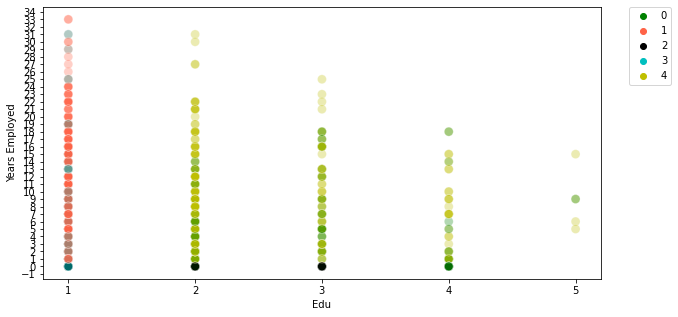

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=df.Edu, 
                y=df['Years Employed'], #df.Defaulted, 
#                 size=df.Income, 
#                 sizes=(10, 450), 
                s=80,
                hue=df.Cluster_5, 
                palette=['g', 'tomato', 'k', 'c', 'y'], 
                alpha=0.3,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 3-D

In [74]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=35, elev=10)


ax.scatter(df.Edu, df.Defaulted, df['Years Employed'], 
           c=df.Cluster_5,
           alpha=0.5, 
           s=50)

ax.set_xlabel('Education')
ax.set_ylabel('Defaulted')
ax.set_zlabel('Years Employed')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Years Employed')

In [50]:
%matplotlib inline